# ---------------------------------------------------------------------------------------------------------------

# Occupancy Detection

##### Öncelikle ilgili kütüphaneleri ve modülleri çağıralım.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics







#### Verisetlerimizi çağıralım.

In [2]:
#kapılar kapalı, birinci ölçüm
kkap1 = pd.read_csv("Veriseti1.txt")
#kapılar kapalı, ikinci ölçüm 
kkap2 = pd.read_csv("Veriseti2.txt")
#kapılar açık, ölçüm
akap = pd.read_csv("Veriseti3.txt")

In [3]:
kkap1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
kkap1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [5]:
kkap2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [6]:
kkap2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [7]:
akap.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


#### Verimizdeki boş değerleri kontrol edelim. Bu verisetleri için böyle bir problemimiz yok.

In [8]:
kkap1.isnull().any()


date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

In [9]:
kkap2.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

In [10]:
kkap2.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

#### Kontroller tamam. Sensörlerden gelen verilerin bir gün içerisindeki değişimini gözlemlemek için belirli bir aralığı çekelim.

In [11]:
a_day = kkap1.loc[370:1810]
#"370","2015-02-05 00:00:00"
#"1810","2015-02-06 00:00:00"
#a_day2 = a_day.drop(["date","Tsqr","TeC"], axis=1)
a_day2 = a_day.drop(["date"], axis=1)
a_day2

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
370,21.2450,25.2450,0.0,456.500000,0.003938,0
371,21.2450,25.2450,0.0,458.500000,0.003938,0
372,21.2600,25.2600,0.0,459.666667,0.003944,0
373,21.2450,25.2450,0.0,464.000000,0.003938,0
374,21.2450,25.2000,0.0,465.000000,0.003931,0
...,...,...,...,...,...,...
1806,20.2225,21.2225,0.0,445.000000,0.003104,0
1807,20.2000,21.2000,0.0,442.500000,0.003097,0
1808,20.2000,21.2000,0.0,443.500000,0.003097,0
1809,20.2000,21.2000,0.0,444.000000,0.003097,0


In [12]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))
d = scaler.fit_transform(a_day2)
names = a_day2.columns
scaled_1day = pd.DataFrame(d, columns=names)


#tarihleri çekelim
dates = kkap1.loc[370:1810]["date"]


In [13]:
scaled_1day


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,0.776952,1.296596,0.0,0.080169,1.044037,0.0
1,0.776952,1.296596,0.0,0.085795,1.044037,0.0
2,0.788104,1.299838,0.0,0.089076,1.050567,0.0
3,0.776952,1.296596,0.0,0.101266,1.044037,0.0
4,0.776952,1.286872,0.0,0.104079,1.036356,0.0
...,...,...,...,...,...,...
1436,0.016729,0.427337,0.0,0.047820,0.137532,0.0
1437,0.000000,0.422474,0.0,0.040788,0.129224,0.0
1438,0.000000,0.422474,0.0,0.043601,0.129224,0.0
1439,0.000000,0.422474,0.0,0.045007,0.129224,0.0


#### Bir güne ait verileri çizdirelim.

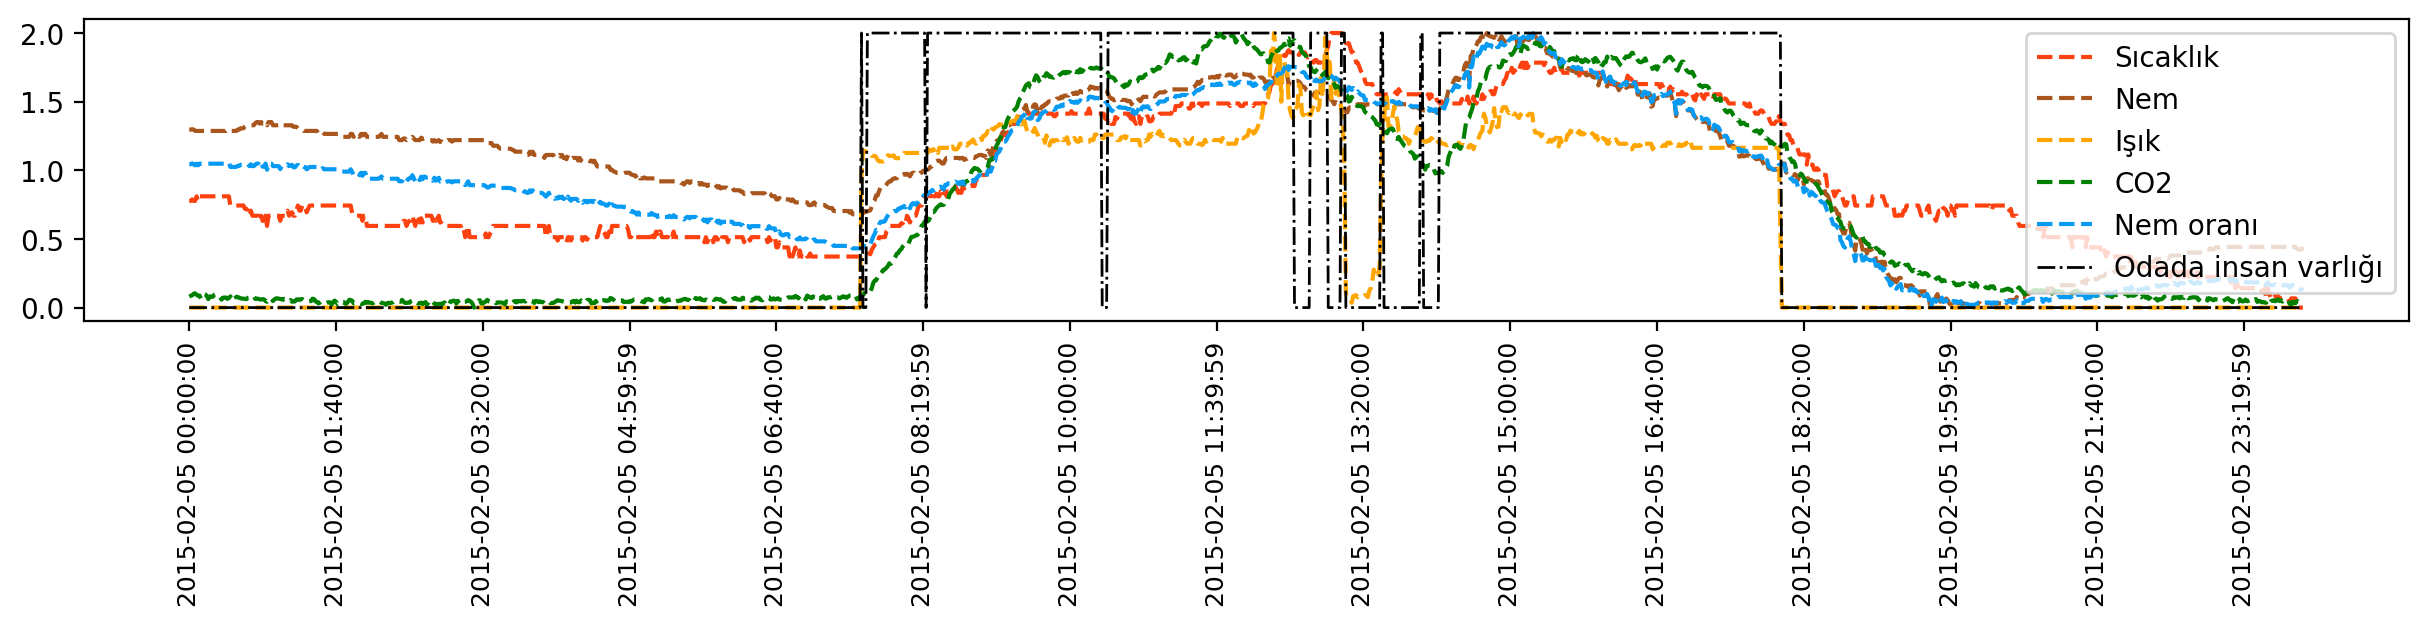

In [14]:

plt.figure(dpi=200, figsize=(15, 2))
plt.plot(dates, scaled_1day["Temperature"], label = "Sıcaklık", ls="--", linewidth=1.5, color= "#FE420F")
plt.plot(dates, scaled_1day["Humidity"], label = "Nem", ls="--",linewidth=1.5, color= "#A9561E")
plt.plot(dates, scaled_1day["Light"], label = "Işık", ls="--", linewidth=1.5, color= "#FFA500")
plt.plot(dates, scaled_1day["CO2"], label = "CO2", ls="--", linewidth=1.5, color= "#008000")
plt.plot(dates, scaled_1day["HumidityRatio"], label = "Nem oranı",ls="--", linewidth=1.5, color= "#069AF3")
plt.plot(dates, scaled_1day["Occupancy"], label = "Odada insan varlığı", ls="-.", linewidth=1, color= "#000000")
plt.xticks(np.arange(0, len(dates)+1, 100), rotation=90, fontsize=9)
plt.legend(loc=1)
plt.show();


#### Hedef değişkenimiz için çift yönlü ilişkileri incelemek için pairplot kullanalım.

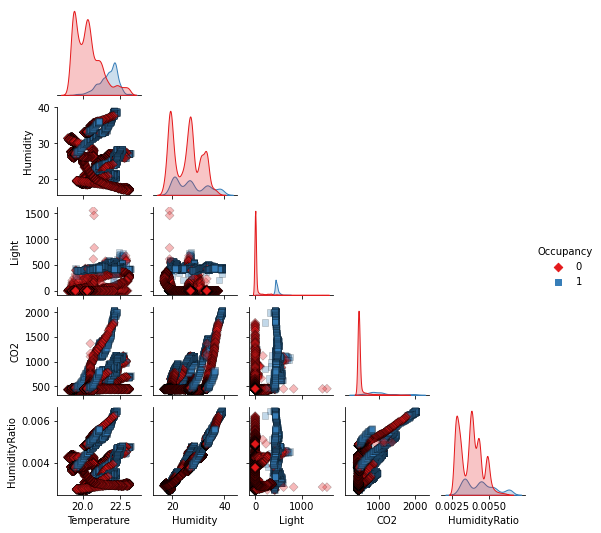

In [15]:
sns.pairplot(data=kkap1, height=1.5, hue="Occupancy",
             palette="Set1",plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor': 'k'}, markers=["D", "s"],
             corner=True);

#### Değişkenler arasında doğrusal ilişki olup olmadığını gözlemlemek için korelasyonlarına bakalım.

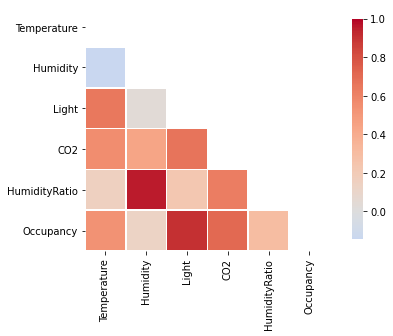

In [16]:
corr = kkap1.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8,4.5))

cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data=corr, mask=mask, vmax=1, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.9});

#Işık, varlık ile kuvvetli bir korelasyona sahip, aynı zamanda diğerleriyle zayıf korelasyona sahip.

#### Daha net bir şekilde bakabiliriz.

In [17]:
corr.style.background_gradient(cmap='coolwarm')

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


#### Sadece hedef değişkenimiz ve diğer değişkenler arasındaki doğrusal ilişkileri tespit etmek için barplot çizdirelim.

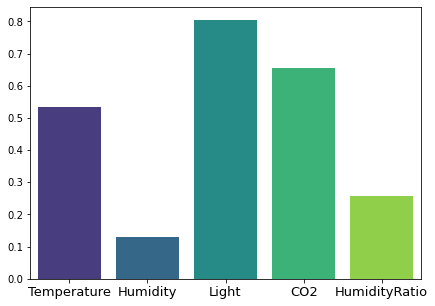

In [18]:
occ = kkap1.corrwith(kkap1["Occupancy"], method="spearman").drop("Occupancy")
plt.figure(figsize=(7,5))
corrbar = sns.barplot(x=occ.index, y=occ.values, palette="viridis", saturation=0.9)
corrbar.set_xticklabels(occ.index, fontsize=13);

#### Her bir veri için iki adet yeni parametre ekleyelim.

In [19]:
kkap1["Tsqr"] = kkap1["Temperature"] ** 2
kkap2["Tsqr"] = kkap2["Temperature"] ** 2
akap["Tsqr"] = akap["Temperature"] ** 2

kkap1["TeC"] = kkap1["Temperature"] * kkap1["CO2"]
kkap2["TeC"] = kkap2["Temperature"] * kkap2["CO2"]
akap["TeC"]  = akap["Temperature"] * akap["CO2"]

In [20]:
kkap1

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Tsqr,TeC
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1,537.3124,16718.575000
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1,535.9225,16529.100000
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1,535.9225,16517.525000
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1,535.9225,16395.987500
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1,533.6100,16273.950000
...,...,...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,443.1025,16571.612500
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,443.1025,16618.975000
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,445.2100,16848.350000
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,445.2100,17309.033333


## Decision Tree

#### Karar ağacı için nitelikleri belirleyip değerleri çekiyoruz.

In [21]:
featuresall = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Tsqr", "TeC"]

X_train = kkap1[featuresall].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[featuresall].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[featuresall].values
y_test2 = akap["Occupancy"].values


In [22]:
kkap1.columns

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy', 'Tsqr', 'TeC'],
      dtype='object')

#### Hiper parametre seçimini yapalım.

In [23]:
#Hyperparameter tuning
dt = DecisionTreeClassifier()

print(dt.get_params().keys())

params_dt = {"max_depth" : [3, 5, 10, 20, 30],
             "min_samples_leaf": [0.04, 0.06, 0.08],
             "max_features" : [0.2, 0.4, 0.6, 0.8],
             "random_state":[4]}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring="accuracy", cv=10)
grid_dt.fit(X=X_train, y=y_train)



dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20, 30],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08],
                         'random_state': [4]},
             scoring='accuracy')

In [24]:
print("Best: %f using %s" % (grid_dt.best_score_, grid_dt.best_params_))


Best: 0.961564 using {'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 0.04, 'random_state': 4}


In [25]:
best_model = grid_dt.best_estimator_
best_model.score(X=X_test1, y=y_test1)

0.9527204502814259

#### Yukarıda edindiğimiz parametreleri modelimizi kurmak için kullanalım. Her bir veri seti için doğruluk skorlarına bakalım. 

In [26]:
# Modeli oluşturmak için
dt = DecisionTreeClassifier(max_depth=3, max_features=0.8, min_samples_leaf=0.04, random_state=4).fit(X=X_train, y=y_train)

# Modeli test etmek için
y_pred0 = dt.predict(X=X_train)
y_pred1 = dt.predict(X=X_test1)
y_pred2 = dt.predict(X=X_test2)

# Skorlar
print(accuracy_score(y_true=y_train, y_pred=y_pred0))
print(accuracy_score(y_true=y_test1, y_pred=y_pred1))
print(accuracy_score(y_true=y_test2, y_pred=y_pred2))

0.97236890580867
0.9527204502814259
0.9336546349466776


#### Modelin performansını değerlendirmek için, hedef niteliğe ait tahminlerin ve gerçek değerlerin karşılaştırıldığı hata matrislerimize bakalım.

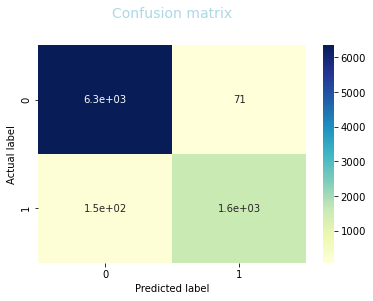

In [27]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

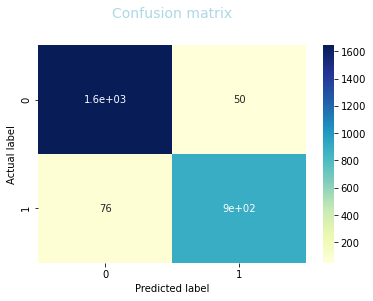

In [28]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

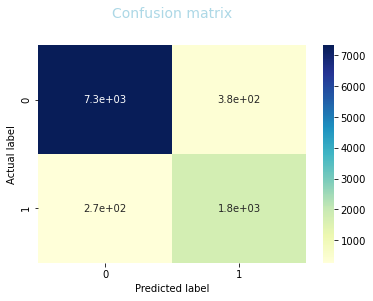

In [29]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

#### Ağacı çizdirelim.

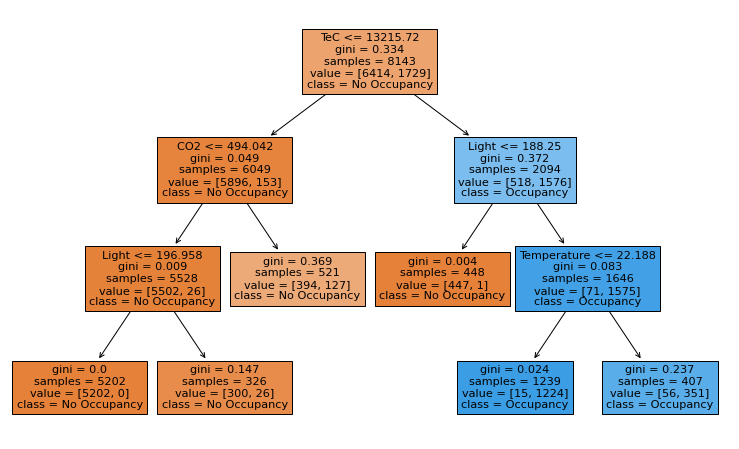

In [30]:
#gini 0=mükemmel eşitlik. 0.3 örneklemin yüzde yetmişini bir sınıfa sokabildiği anlamına geliyor. 0.3'lük kısmı rastgele sınıflara dağıtılmış.
plt.figure(figsize=(13,8))
plot_tree(dt, feature_names=featuresall, class_names=["No Occupancy","Occupancy"], filled=True)
plt.show()

#### Modelin nitelikler için önem sırasını görmek için feature_importances_ plotunu çizdirelim.

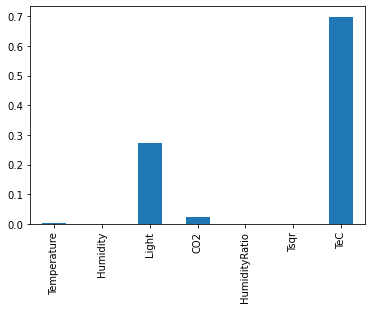

In [31]:
fi = pd.Series(data=dt.feature_importances_, index=featuresall)
fi.plot.bar();

### Light, CO2 ve eklediğimiz TeC öne çıkıyor. Eklediğimiz nitelik dışında, sadece bu nitelikleri kullanarak ve aynı adımları tekrarlayarak yeni bir karar ağacı oluşturalım.

### Seçili nitelikler ile:

In [32]:
features1 = ["CO2", "Light"]

X_train = kkap1[features1].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[features1].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[features1].values
y_test2 = akap["Occupancy"].values

#### Hiper parametre seçimi için seçili parametrelere bakalım.

In [33]:
#Hyperparameter tuning
dt2 = DecisionTreeClassifier()

print(dt.get_params().keys())

params_dt2 = {"max_depth" : [2, 3, 5, 8, 10, 20, 30],
             "min_samples_leaf": [0.02, 0.04, 0.06, 0.08],
             "max_features" : [0.2, 0.4, 0.6, 0.8],
             "random_state":[4]}

grid_dt2 = GridSearchCV(estimator=dt2, param_grid=params_dt2, scoring="accuracy", cv=10)
grid_dt2.fit(X=X_train, y=y_train)


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8, 10, 20, 30],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.02, 0.04, 0.06, 0.08],
                         'random_state': [4]},
             scoring='accuracy')

In [34]:
print("Best: %f using %s" % (grid_dt2.best_score_, grid_dt2.best_params_))


Best: 0.972251 using {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.02, 'random_state': 4}


In [35]:
# Modeli oluşturmak için
dt2 = DecisionTreeClassifier(max_depth=3, max_features=0.2, min_samples_leaf=0.02, random_state=4).fit(X=X_train, y=y_train)

# Modeli test etmek için
y_pred0 = dt2.predict(X=X_train)
y_pred1 = dt2.predict(X=X_test1)
y_pred2 = dt2.predict(X=X_test2)
print(accuracy_score(y_true=y_train, y_pred=y_pred0))
print(accuracy_score(y_true=y_test1, y_pred=y_pred1))
print(accuracy_score(y_true=y_test2, y_pred=y_pred2))

0.9744565884809039
0.9568480300187617
0.9211443806398687


### Hata matrislerimizi inceleyelim.

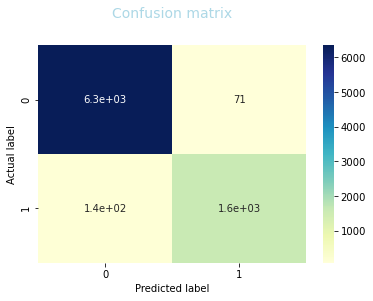

In [36]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

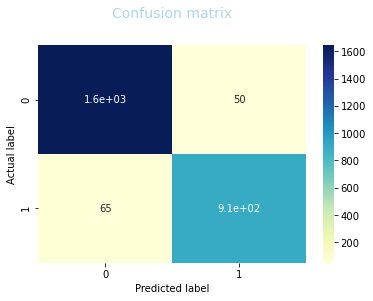

In [37]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

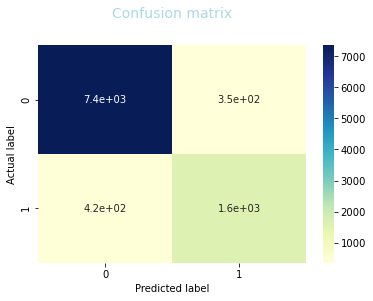

In [38]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Random Forest

#### Şimdi yukarıda kullandığımız tüm niteliklerle bu sefer Random Forest kullanalım.

In [39]:
X_train = kkap1[featuresall].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[featuresall].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[featuresall].values
y_test2 = akap["Occupancy"].values

#### Random Forest (Rastgele Orman :D) için yeni hiper parametre seçimimizi yapalım.

In [40]:
rf = RandomForestClassifier()

print(rf.get_params())

params_rf = {"n_estimators" :[100, 150, 200],
             "max_depth" :  [3, 5, 10],
             "max_features" :[0.2, 0.4, 0.6, 0.8],
             "random_state" : [4]}

grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring="accuracy", cv=10)
grid_rf.fit(X=X_train, y=y_train)



{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [100, 150, 200], 'random_state': [4]},
             scoring='accuracy')

In [41]:
print("Best: %f using %s" % (grid_rf.best_score_, grid_rf.best_params_))

Best: 0.973107 using {'max_depth': 3, 'max_features': 0.4, 'n_estimators': 200, 'random_state': 4}


### Edindiğimiz parametreleri kullanarak modelimizi oluşturalım.

In [42]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3, max_features=0.4, random_state=4)
rf.fit(X=X_train, y=y_train)

#Ve modeli test edelim.
y_pred0 = rf.predict(X=X_train)
y_pred1 = rf.predict(X=X_test1)
y_pred2 = rf.predict(X=X_test2)
print(accuracy_score(y_true=y_train, y_pred=y_pred0))
print(accuracy_score(y_true=y_test1, y_pred=y_pred1))
print(accuracy_score(y_true=y_test2, y_pred=y_pred2))



0.9891931720496132
0.9759849906191369
0.9787735849056604


### Hata matrislerimizi inceleyelim.

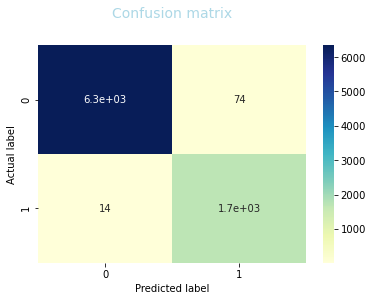

In [43]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

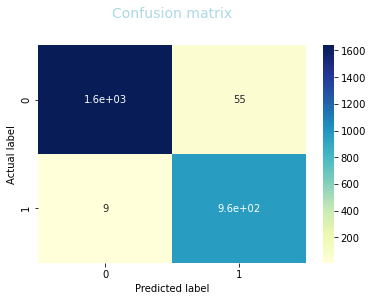

In [44]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

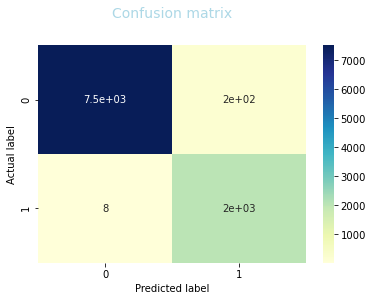

In [45]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

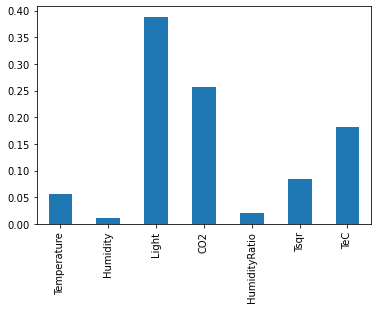

In [46]:
fi = pd.Series(data=rf.feature_importances_, index=featuresall)
fi.plot.bar();

### Seçili nitelikler ile:

### Light, CO2, TeC öne çıkıyor. Yine sadece Light, CO2 kullanarak yapalım. Aynı işlemleri tekrarlıyoruz.

In [47]:
features2 = ["CO2", "Light", "Temperature"]

X_train = kkap1[features2].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[features2].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[features2].values
y_test2 = akap["Occupancy"].values

In [48]:
rf2 = RandomForestClassifier()

print(rf2.get_params())

params_rf2 = {"n_estimators" :[50, 125, 200],
             "max_depth" :  [3, 5, 10],
             "max_features" :[0.2, 0.4, 0.6, 0.8],
             "random_state" : [4]}

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=params_rf2, scoring="accuracy", cv=10)
grid_rf2.fit(X=X_train, y=y_train)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'n_estimators': [50, 125, 200], 'random_state': [4]},
             scoring='accuracy')

In [49]:
print("Best: %f using %s" % (grid_rf2.best_score_, grid_rf2.best_params_))

Best: 0.978268 using {'max_depth': 3, 'max_features': 0.2, 'n_estimators': 50, 'random_state': 4}


In [50]:
#Modeli oluşturmak için
rf = RandomForestClassifier(n_estimators=50, max_depth=3, max_features=0.2, random_state=4)

#Modeli eğitmek için
rf.fit(X=X_train, y=y_train)

#Modeli test etmek için
y_pred0 = rf.predict(X=X_train)
y_pred1 = rf.predict(X=X_test1)
y_pred2 = rf.predict(X=X_test2)
print(accuracy_score(y_true=y_train, y_pred=y_pred0))
print(accuracy_score(y_true=y_test1, y_pred=y_pred1))
print(accuracy_score(y_true=y_test2, y_pred=y_pred2))


0.9890703671865406
0.9782363977485928
0.9932321575061526


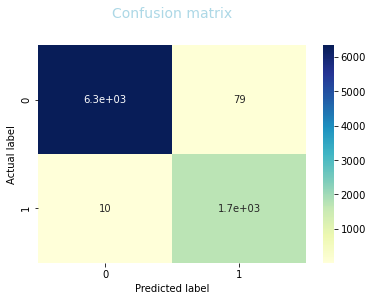

In [51]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

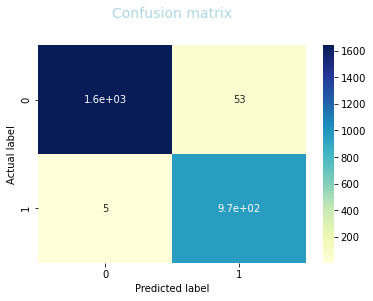

In [52]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

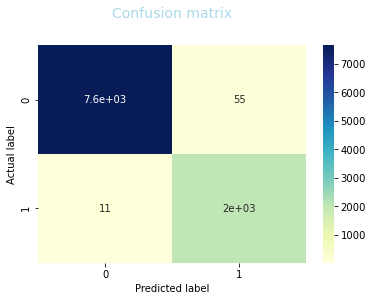

In [53]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Şimdi model performansını arttırmak için tahminleyici model olarak karar ağaçlarını kullanarak bir boosting algoritması kullanalım.

## Adaptive Boosting (AdaBoost)

In [54]:
featuresall = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Tsqr", "TeC"]

X_train = kkap1[featuresall].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[featuresall].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[featuresall].values
y_test2 = akap["Occupancy"].values


In [55]:
adc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

print(adc.get_params())

params_adc = { "base_estimator__max_depth":[3,6,9],
               "base_estimator__min_samples_leaf":[5,10],
               "n_estimators":[10,50,250],
               "learning_rate":[0.01,0.1],
               "random_state":[4]
               }

grid_adc = GridSearchCV(estimator=adc, param_grid=params_adc, scoring="accuracy")
grid_adc.fit(X=X_train, y=y_train)


{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [3, 6, 9],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250], 'random_state': [4]},
             scoring='accuracy')

In [56]:
print("Best: %f using %s" % (grid_adc.best_score_, grid_adc.best_params_))

Best: 0.963289 using {'base_estimator__max_depth': 6, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.01, 'n_estimators': 10, 'random_state': 4}


In [57]:
adc = AdaBoostClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(min_samples_leaf=10, max_depth=6), 
                         learning_rate=0.01, random_state=4)
adc.fit(X=X_train, y=y_train)



print("Accuracy:", adc.score(X_test1, y_test1))
print("Accuracy:", adc.score(X_test2, y_test2))





Accuracy: 0.9365853658536586
Accuracy: 0.9554963084495488


In [58]:
y_pred1 = adc.predict(X_test1)
y_pred2 = adc.predict(X_test2)

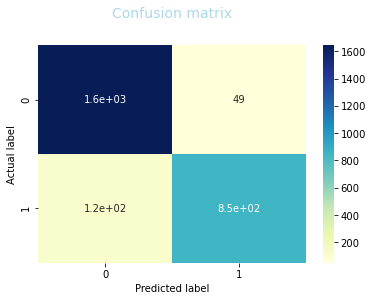

In [59]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

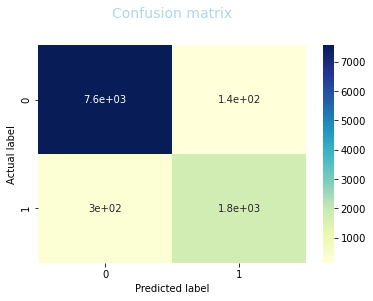

In [60]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

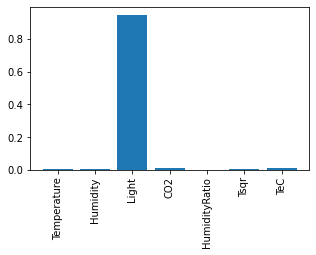

In [61]:
plt.figure(figsize=(5,3))
plt.bar(x= featuresall, height=adc.feature_importances_)
plt.xticks(rotation=90);

### Öne çıkan Light and CO2 için tekrarlayalım.

In [62]:
features1 = ["CO2", "Light"]

X_train = kkap1[features1].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[features1].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[features1].values
y_test2 = akap["Occupancy"].values

In [63]:
adc2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

print(adc2.get_params())

params_adc2 = { "base_estimator__max_depth":[3,6,9],
                "base_estimator__min_samples_leaf":[5,10],
                "n_estimators":[10,50,250],
                "learning_rate":[0.01,0.1],
                "random_state":[4]
               }

grid_adc2 = GridSearchCV(estimator=adc2, param_grid=params_adc2, scoring="accuracy")
grid_adc2.fit(X=X_train, y=y_train)

{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'base_estimator__max_depth': [3, 6, 9],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250], 'random_state': [4]},
             scoring='accuracy')

In [64]:
print("Best: %f using %s" % (grid_adc2.best_score_, grid_adc2.best_params_))

Best: 0.969183 using {'base_estimator__max_depth': 3, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 4}


In [65]:
adc2 = AdaBoostClassifier(n_estimators=10, base_estimator=DecisionTreeClassifier(min_samples_leaf=10, max_depth=36), 
                         learning_rate=0.01, random_state=4)
adc2.fit(X=X_train, y=y_train)



print("Accuracy:", adc2.score(X_test1, y_test1))
print("Accuracy:", adc2.score(X_test2, y_test2))

y_pred1 = adc2.predict(X_test1)
y_pred2 = adc2.predict(X_test2)

Accuracy: 0.9230769230769231
Accuracy: 0.9756972928630024


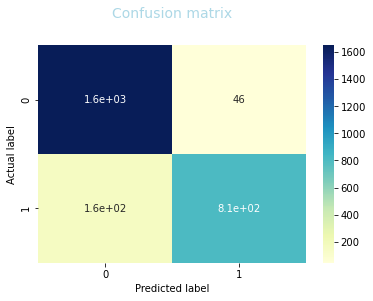

In [66]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

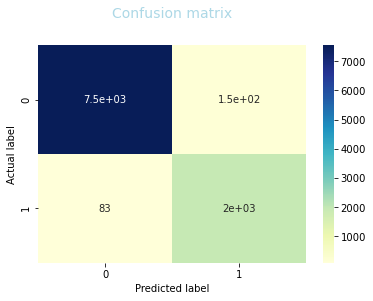

In [67]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Logistic Regression

In [68]:
featuresall = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Tsqr", "TeC"]

X_train = kkap1[featuresall].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[featuresall].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[featuresall].values
y_test2 = akap["Occupancy"].values

In [69]:
lg = LogisticRegression(random_state=4)

# Train model

lg.fit(X=X_train, y=y_train)


# Test the model
y_pred0 = lg.predict(X=X_train)
y_pred1 = lg.predict(X=X_test1)
y_pred2 = lg.predict(X=X_test2)

# Accuracy
print(accuracy_score(y_true=y_train, y_pred=y_pred0))
print(accuracy_score(y_true=y_test1, y_pred=y_pred1))
print(accuracy_score(y_true=y_test2, y_pred=y_pred2))

0.9861230504727987
0.9666041275797373
0.9570344544708778


In [70]:
print(classification_report(y_true=y_test1, y_pred=y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1693
           1       0.95      0.96      0.95       972

    accuracy                           0.97      2665
   macro avg       0.96      0.97      0.96      2665
weighted avg       0.97      0.97      0.97      2665



In [71]:
print(classification_report(y_true=y_test2, y_pred=y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7703
           1       0.90      0.90      0.90      2049

    accuracy                           0.96      9752
   macro avg       0.93      0.94      0.94      9752
weighted avg       0.96      0.96      0.96      9752



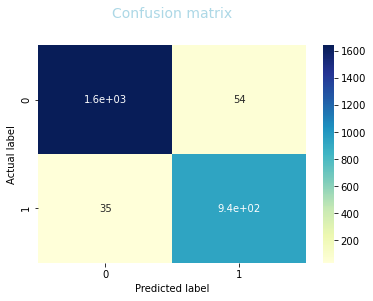

In [72]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

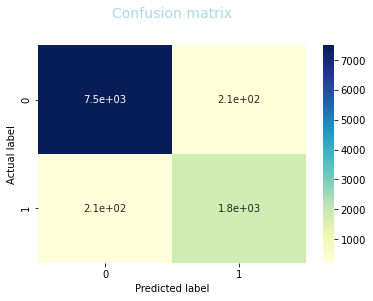

In [73]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

### Yine Light ve CO2 kullanmak istiyorum. Seçili nitelikler için:

In [74]:
features1 = ["CO2", "Light"]

X_train = kkap1[features1].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[features1].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[features1].values
y_test2 = akap["Occupancy"].values

In [75]:
lg2= LogisticRegression(random_state=4)

# Train model

lg2.fit(X=X_train, y=y_train)


# Test the model
y_pred0 = lg2.predict(X=X_train)
y_pred1 = lg2.predict(X=X_test1)
y_pred2 = lg2.predict(X=X_test2)

# Accuracy
print(accuracy_score(y_true=y_train, y_pred=y_pred0))
print(accuracy_score(y_true=y_test1, y_pred=y_pred1))
print(accuracy_score(y_true=y_test2, y_pred=y_pred2))

0.9883335380081051
0.9782363977485928
0.993129614438064


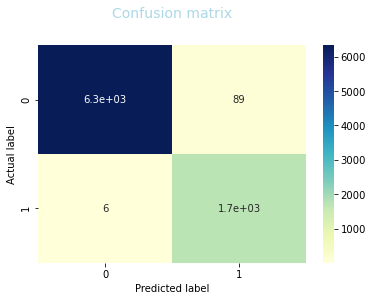

In [76]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

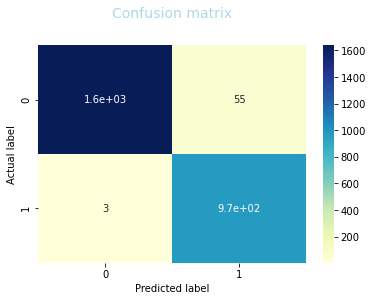

In [77]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

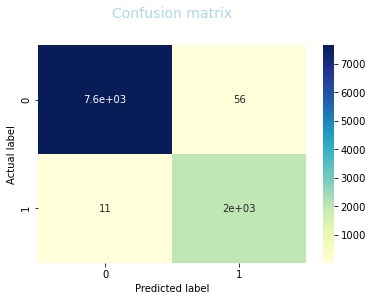

In [78]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

## Gradient Boosting 

In [79]:
featuresall = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Tsqr", "TeC"]

X_train = kkap1[featuresall].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[featuresall].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[featuresall].values
y_test2 = akap["Occupancy"].values

In [80]:
gbc = GradientBoostingClassifier()

print(gbc.get_params())

params_gbc = {"learning_rate" :[0.05, 0.01, 0.1, 0.5],
             "n_estimators" :  [50 ,100, 200],
             "random_state": [0]}

grid_gbc = GridSearchCV(estimator=gbc, param_grid=params_gbc, scoring="accuracy", cv=10)
grid_gbc.fit(X=X_train, y=y_train)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200], 'random_state': [0]},
             scoring='accuracy')

In [81]:
print("Best: %f using %s" % (grid_gbc.best_score_, grid_gbc.best_params_))


Best: 0.971522 using {'learning_rate': 0.05, 'n_estimators': 50, 'random_state': 0}


In [82]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05)
gbc.fit(X=X_train, y=y_train)

print(gbc.score(X=X_train, y=y_train))
print(gbc.score(X=X_test1, y=y_test1))
print(gbc.score(X=X_test2, y=y_test2))


0.9906668304064841
0.9489681050656661
0.9643150123051681


In [83]:
# Test the model
y_pred0 = gbc.predict(X=X_train)
y_pred1 = gbc.predict(X=X_test1)
y_pred2 = gbc.predict(X=X_test2)

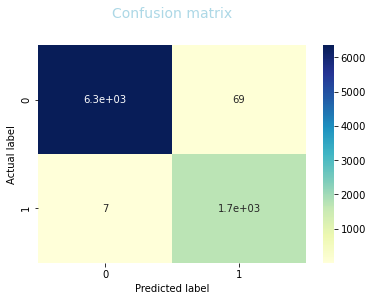

In [84]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

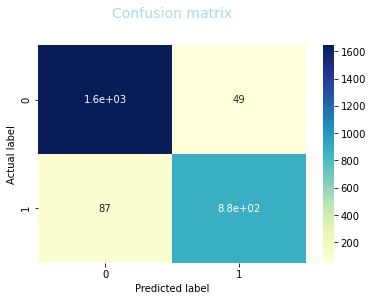

In [85]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

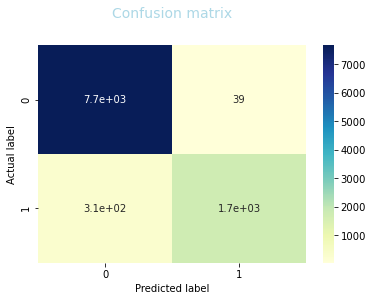

In [86]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

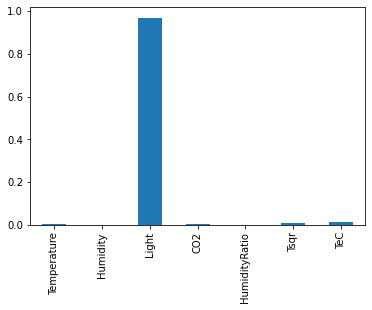

In [87]:
fi = pd.Series(data=gbc.feature_importances_, index=featuresall)
fi.plot.bar();

### Seçili nitelikler için:

In [88]:
features3 = ["Temperature","Light", "CO2", "TeC"]

X_train = kkap1[features3].values
y_train = kkap1["Occupancy"].values
X_test1 = kkap2[features3].values
y_test1 = kkap2["Occupancy"].values
X_test2 = akap[features3].values
y_test2 = akap["Occupancy"].values

##### Hiper parametre seçimi (Grid Search)

In [89]:
gbc2 = GradientBoostingClassifier()

print(gbc2.get_params())

params_gbc2 = {"learning_rate" :[0.05, 0.01, 0.1, 0.5],
             "n_estimators" :  [50 ,100, 200],
             "random_state": [0]}

grid_gbc2 = GridSearchCV(estimator=gbc2, param_grid=params_gbc2, scoring="accuracy", cv=10)
grid_gbc2.fit(X=X_train, y=y_train)


{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200], 'random_state': [0]},
             scoring='accuracy')

In [90]:
print("Best: %f using %s" % (grid_gbc2.best_score_, grid_gbc2.best_params_))


Best: 0.978149 using {'learning_rate': 0.05, 'n_estimators': 50, 'random_state': 0}


In [91]:
gbc2 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05)
gbc2.fit(X=X_train, y=y_train)

print(gbc2.score(X=X_train, y=y_train))
print(gbc2.score(X=X_test1, y=y_test1))
print(gbc2.score(X=X_test2, y=y_test2))



0.9911580498587744
0.9617260787992495
0.9607260049220673


In [92]:
# Test the model
y_pred0 = gbc2.predict(X=X_train)
y_pred1 = gbc2.predict(X=X_test1)
y_pred2 = gbc2.predict(X=X_test2)

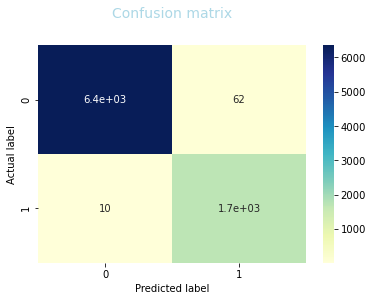

In [93]:
cnfm = confusion_matrix(y_true=y_train, y_pred=y_pred0)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

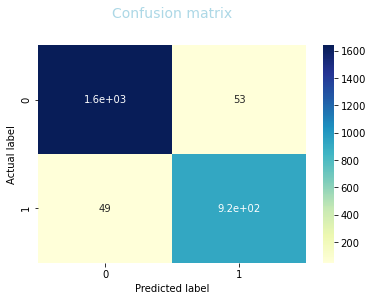

In [94]:
cnfm = confusion_matrix(y_true=y_test1, y_pred=y_pred1)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

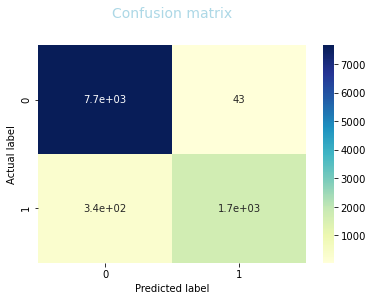

In [95]:
cnfm = confusion_matrix(y_true=y_test2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True, cmap="YlGnBu")
plt.title('Confusion matrix', y=1.1, fontdict= {"fontsize": 14, "color" : "lightblue"})
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

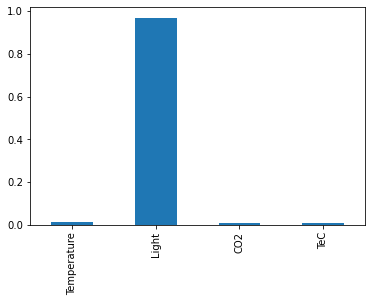

In [96]:
fi = pd.Series(data=gbc2.feature_importances_, index=features3)
fi.plot.bar();

In [101]:

from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Models", "Features", "Accuracy Score|Training","Accuracy Score|Test 1", "Accuracy Score|Test2"]) 
  
# Add rows 
myTable.add_row(["Decision Tree 1", "All", "0.9723","0.9527","0.9336"])
myTable.add_row(["Decision Tree 2", "Light, CO2", "0.9744","0.9564","0.9211"])
myTable.add_row(["Random Forest 1", "All",  "0.9891","0.9759","0.9787"]) 
myTable.add_row(["Random Forest 2", "CO2, Light, Temperature", "0.9890","0.97829","0.9932"]) 
myTable.add_row(["Logistic Regression 1", "All", "0.9861","0.9666","0.957"]) 
myTable.add_row(["Logistic Regression 2", "Light, CO2", "0.9883","0.9782","0.993"]) 
myTable.add_row(["Gradient Boosting 1",  "All", "0.9906","0.9489","0.9614"]) 
myTable.add_row(["Gradient Boosting 2",  "Temperature, Light, CO2 , TeC", "0.9911","0.961","0.960"])
myTable.add_row(["AdaBoost 1", "All",  "-","0.9365","0.9554"]) 
myTable.add_row(["AdaBoost 2", "Light, CO2",  "-","0.9253","0.9756"])                 
 

  
print(myTable)

+-----------------------+-------------------------------+-------------------------+-----------------------+----------------------+
|         Models        |            Features           | Accuracy Score|Training | Accuracy Score|Test 1 | Accuracy Score|Test2 |
+-----------------------+-------------------------------+-------------------------+-----------------------+----------------------+
|    Decision Tree 1    |              All              |          0.9723         |         0.9527        |        0.9336        |
|    Decision Tree 2    |           Light, CO2          |          0.9744         |         0.9564        |        0.9211        |
|    Random Forest 1    |              All              |          0.9891         |         0.9759        |        0.9787        |
|    Random Forest 2    |    CO2, Light, Temperature    |          0.9890         |        0.97829        |        0.9932        |
| Logistic Regression 1 |              All              |          0.9861         |

# ---------------------------------------------------------------------------------------------------------------